In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rtlsdr import RtlSdr
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
import random
from tensorflow.keras.layers import MaxPooling1D, Conv1D
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [3]:
def feature_extraction(samples):
    fft=np.fft.fft(samples)
    #(f, S) = scipy.signal.periodogram(samples, 2.048e6, scaling='density')
    #new_data=fft.extend(S)
    return fft

In [4]:
model=Sequential()
model.add(Conv1D(64,5,activation='relu',input_shape=(1024,1)))
model.add(Conv1D(64,5,activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

 cycle: 0  loss: 2.318053722381592
 cycle: 1  loss: 3.053323984146118
 cycle: 2  loss: 3.1798083782196045
 cycle: 3  loss: 1.7925852537155151
 cycle: 4  loss: 2.3753280639648438
 cycle: 5  loss: 2.4241490364074707
 cycle: 6  loss: 1.6701910495758057
 cycle: 7  loss: 2.7726705074310303
 cycle: 8  loss: 2.805391311645508
 cycle: 9  loss: 1.6557612419128418
 cycle: 10  loss: 1.5904605388641357
 cycle: 11  loss: 3.2341296672821045
 cycle: 12  loss: 2.4732651710510254
 cycle: 13  loss: 1.892584204673767
 cycle: 14  loss: 2.614750385284424
 cycle: 15  loss: 2.5760316848754883
 cycle: 16  loss: 2.267486333847046
 cycle: 17  loss: 2.1066174507141113
 cycle: 18  loss: 1.952195644378662
 cycle: 19  loss: 1.9637008905410767
 cycle: 20  loss: 2.2571253776550293
 cycle: 21  loss: 2.569218635559082
 cycle: 22  loss: 2.650135040283203
 cycle: 23  loss: 1.8025119304656982
 cycle: 24  loss: 1.7337958812713623
 cycle: 25  loss: 1.9031250476837158
 cycle: 26  loss: 2.214367628097534
 cycle: 27  loss: 2.4

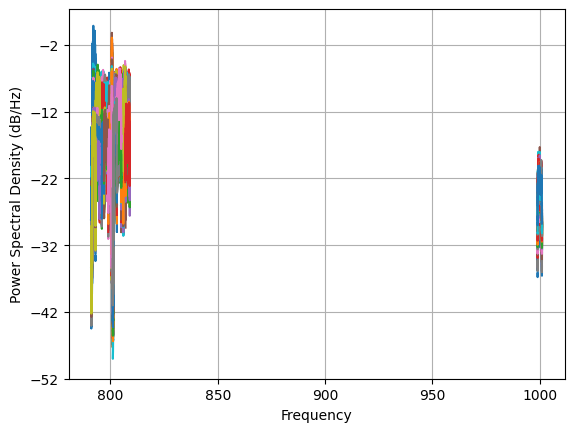

In [6]:
sdr = RtlSdr()
sdr.sample_rate = 2.048e6  # Hz
#sdr.center_freq = 792e6  # Hz
sdr.freq_correction = 60  # PPM
sdr.gain = 'auto'
i=0
loss_list=[0]
try:
        while True:       
            # Process and extract features from the samples
            #freqs={'0':792e6,'1':794e6,'2':796e6,'3':798e6,'4':800e6,'5':802e6,'6':804e6,'7':806e6,'8':808e6}
            freqs={'0':1000e6,'1':792e6,'2':794e6,'3':796e6,'4':798e6,'5':800e6,'6':802e6,'7':804e6,'8':806e6,'9':808e6}
            a=random.choice(list(freqs.keys()))
            sdr.center_freq =  freqs[a] # Hz

            samples = sdr.read_samples(256*1024)
            # Determine the label based on the frequency range
            label=np.array(int(a))
            features, freqs = plt.psd(samples, NFFT=1024, Fs=sdr.sample_rate / 1e6, Fc=sdr.center_freq / 1e6)
            features = np.expand_dims(features, axis=0) 
            features=features.real
            # Fit the scaler
            features[0]=features[0]/max(abs(features[0]))
            #features = np.expand_dims(features, axis=0)  # Add batch dimension            
            label_one_hot = tf.keras.utils.to_categorical(label, num_classes=10)
            label_one_hot = np.expand_dims(label_one_hot, axis=0)
            #features=features.reshape(4096,1)
            # Train the model incrementally with the new data
            a=model.train_on_batch(features, label_one_hot)
            loss_list.append(a[0])
            print(" cycle: {}  loss: {}".format(i,a[0]))
            i=i+1
            
except KeyboardInterrupt:
        pass
sdr.close()

1/1 [==============================] - 0s 98ms/step
True Prediciton
, accuracy: 1.0
1/1 [==============================] - 0s 20ms/step
True Prediciton
, accuracy: 1.0
1/1 [==============================] - 0s 18ms/step
True Prediciton
, accuracy: 1.0
1/1 [==============================] - 0s 22ms/step
True Prediciton
, accuracy: 1.0
1/1 [==============================] - 0s 21ms/step
True Prediciton
, accuracy: 1.0
1/1 [==============================] - 0s 21ms/step
True Prediciton
, accuracy: 1.0
1/1 [==============================] - 0s 19ms/step
True Prediciton
, accuracy: 1.0
1/1 [==============================] - 0s 19ms/step
True Prediciton
, accuracy: 1.0
1/1 [==============================] - 0s 22ms/step
True Prediciton
, accuracy: 1.0
1/1 [==============================] - 0s 19ms/step
True Prediciton
, accuracy: 1.0
1/1 [==============================] - 0s 21ms/step
True Prediciton
, accuracy: 1.0
1/1 [==============================] - 0s 20ms/step
True Prediciton
, accura

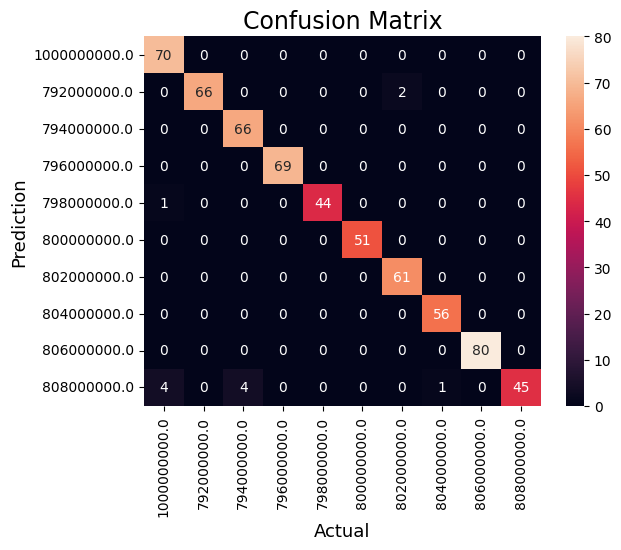

In [7]:
sdr = RtlSdr()
sdr.sample_rate = 2.048e6  # Hz
#sdr.center_freq = 792e6  # Hz
sdr.freq_correction = 60  # PPM
sdr.gain = 'auto'
j=0
true_=0
i=0
acc_list=[0]
prediction=[]
actual=[]
prediction.clear()
actual.clear()
try:
    while True:
        
            #freqs={'0':792e6,'1':794e6,'2':796e6,'3':798e6,'4':800e6,'5':802e6,'6':804e6,'7':806e6,'8':808e6}

            freqs={'0':1000e6,'1':792e6,'2':794e6,'3':796e6,'4':798e6,'5':800e6,'6':802e6,'7':804e6,'8':806e6,'9':808e6}
            a=random.choice(list(freqs.keys()))
            sdr.center_freq =  freqs[a] # Hz

            samples = sdr.read_samples(256*1024)
            # Determine the label based on the frequency range
            label=np.array(int(a))

            # Convert label to one-hot encoding
            #features=feature_extraction(samples)
            features, freqs = plt.psd(samples, NFFT=1024, Fs=sdr.sample_rate / 1e6, Fc=sdr.center_freq / 1e6)

            features = np.expand_dims(features, axis=0) 

            features=features.real

            features[0]=features[0]/max(abs(features[0]))
            
            label_one_hot = tf.keras.utils.to_categorical(label, num_classes=10)
            label_one_hot = np.expand_dims(label_one_hot, axis=0)
            
            q=model.predict(features)
            predicted_classes = np.argmax(q, axis=1)
            real_class=np.argmax(label_one_hot,axis=1)
            prediction.append(predicted_classes)
            actual.append(real_class)
            if predicted_classes==real_class:
                  print("True Prediciton") 
                  true_=true_+1
            else:
                  print("Wrong Prediciton")
            i=i+1
            accuracy=true_/i
            acc_list.append(accuracy)
            print(", accuracy: {}".format(accuracy))

except KeyboardInterrupt:
      cm = confusion_matrix(actual,prediction)
 
      #Plot the confusion matrix.
      sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=[1000e6,792e6,794e6,796e6,798e6,800e6,802e6,804e6,806e6,808e6],
            yticklabels=[1000e6,792e6,794e6,796e6,798e6,800e6,802e6,804e6,806e6,808e6])
      plt.ylabel('Prediction',fontsize=13)
      plt.xlabel('Actual',fontsize=13)
      plt.title('Confusion Matrix',fontsize=17)
      plt.show()
      pass
sdr.close()

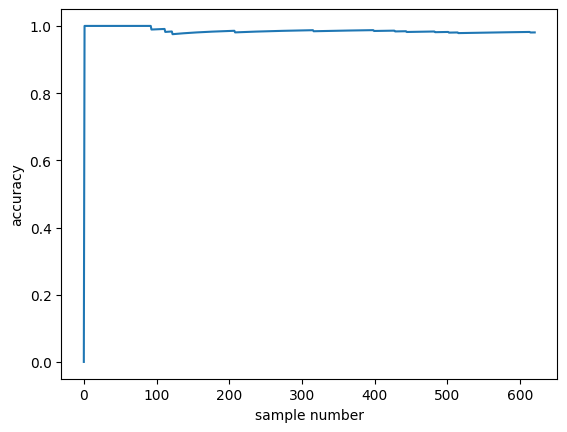

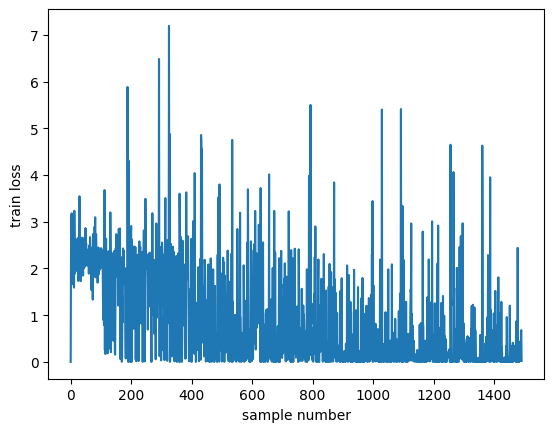

In [8]:
plt.plot(acc_list)
plt.xlabel('sample number')
plt.ylabel('accuracy')
plt.show()
plt.plot(loss_list)
plt.xlabel('sample number')
plt.ylabel('train loss')
plt.show()

In [115]:
freqs={'0':1000e6,'1':792e6,'2':794e6,'3':796e6,'4':798e6,'5':800e6,'6':802e6,'7':804e6,'8':806e6,'9':808e6}
a=random.choice(list(freqs.keys()))
center_freq =  freqs[a] # Hz
#samples = sdr.read_samples(256*1024)
# Determine the label based on the frequency range
label=np.array(int(a))
# Convert label to one-hot encoding
#features=feature_extraction(samples)
#features, freqs = plt.psd(samples, NFFT=1024, Fs=sdr.sample_rate / 1e6, Fc=sdr.center_freq / 1e6)
#features = np.expand_dims(features, axis=0) 
#features=features.real
# Fit the scaler on your data
#features[0]=features[0]/max(abs(features[0]))
# Reshape features and labels for model training
#features = np.expand_dims(features, axis=0)  # Add batch dimension

#print(features)
label_one_hot = tf.keras.utils.to_categorical(label, num_classes=10)
#label_one_hot = np.expand_dims(label_one_hot, axis=0)

print(f"random choice: {a}  center frequency: {center_freq}  label: {label}  label_one_hot: {label_one_hot}")

random choice: 5  center frequency: 800000000.0  label: 5  label_one_hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


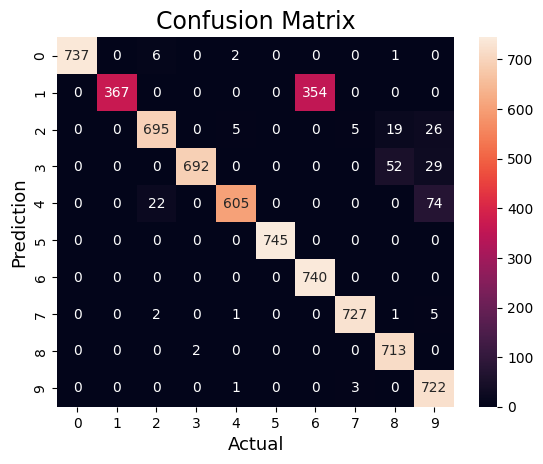

In [158]:
cm = confusion_matrix(actual,prediction)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=[0,1,2,3,4,5,6,7,8,9],
            yticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()